### Description
age: Age of the patient

sex: Sex of the patient (1 = male, 0 = female)

cp: Chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)

trestbps: Resting blood pressure (in mm Hg)

chol: Serum cholesterol in mg/dl

fbs: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)

restecg: Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy)

thalach: Maximum heart rate achieved

exang: Exercise-induced angina (1 = yes, 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: The slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)

ca: Number of major vessels (0-3) colored by fluoroscopy

thal: Thalassemia (1 = normal, 2 = fixed defect, 3 = reversible defect)

target: Diagnosis of heart disease (1 = presence, 0 = absence)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
import psutil

In [2]:
data = pd.read_csv('heart_disease.csv')

# Exploratory Data Analysis

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Remove duplicate columns

In [4]:
data.shape

(1025, 14)

In [5]:
duplicated_rows = data.duplicated()
print(duplicated_rows.sum())
data.drop_duplicates(inplace = True)

723


In [6]:
data.shape

(302, 14)

### Checking for missing values.

In [7]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values in the dataset.

### Datatypes

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


### Distinguish Categorical and Numerical Columns

__age__: Age of the patient - __Numerical__

__sex__: Sex of the patient (1 = male, 0 = female) - __Has only 2 values , hence no need for One Hot Encoding. - Numerical__

__cp__: Chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic) - __Categorical , needs One Hot Encoding.__

__trestbps__: Resting blood pressure (in mm Hg) - __Numerical__

__chol__: Serum cholesterol in mg/dl - __Numerical__

__fbs__: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false) - __Numerical__

__restecg__: Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy) - __Categorical. needs One Hot Encoding.__

__thalach__: Maximum heart rate achieved - __Numerical__

__exang__: Exercise-induced angina (1 = yes, 0 = no) - __Numerical__

__oldpeak__: ST depression induced by exercise relative to rest - __Numerical__

__slope__: The slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping) - __Categorical ,needs One Hot Encoding.__

__ca__: Number of major vessels (0-3) colored by fluoroscopy - __Numerical.__

__thal__: Thalassemia (1 = normal, 2 = fixed defect, 3 = reversible defect) - __Categorical, needs One Hot Encoding.__

__target__: Diagnosis of heart disease (1 = presence, 0 = absence) - __Numerical.__

# Data Cleaning and Preprocessing

### Splitting data into numerical and categorical columns

In [9]:
num_df = data[['age','trestbps','chol','thalach','exang','oldpeak','ca','target']]
cat_df = data[['sex','cp','fbs','restecg','slope','thal']]

### Outlier Analysis

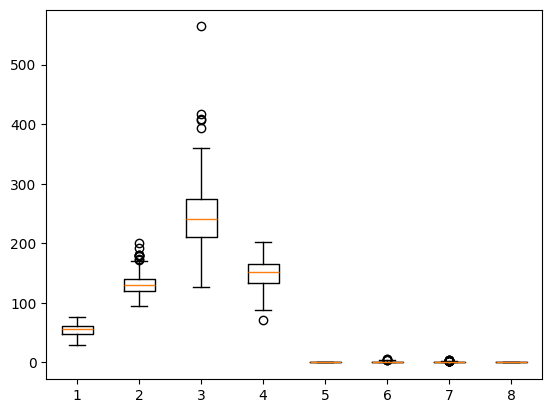

In [10]:
plt.boxplot(num_df)
plt.show()

In [11]:
def remove_outliers(df,column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3-q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df[column_name] = df[column_name].clip(upper = upper_bound)
    df[column_name] = df[column_name].clip(lower = lower_bound)
    return df[column_name]

In [12]:
num_cols = num_df.columns.tolist()
for col in num_cols:
    num_df[col] = remove_outliers(num_df,col)

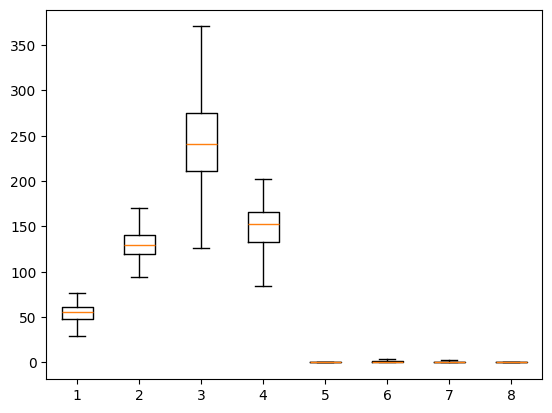

In [13]:
plt.boxplot(num_df)
plt.show()

### Encoding Categorical Columns

In [14]:
encoder = OneHotEncoder(handle_unknown = 'ignore',sparse_output = False)
encoded_data = encoder.fit_transform(cat_df[['cp','restecg','slope','thal']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['cp','restecg','slope','thal']))

In [15]:
encoded_df

,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
298,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
299,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
300,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [16]:
encoded_df.index = cat_df.index
cat_df = pd.concat([encoded_df,cat_df],axis = 1)
cat_df.drop(columns = ['cp','restecg','slope','thal'],inplace = True)

In [17]:
cat_df.columns

Index(['cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0', 'restecg_1', 'restecg_2',
       'slope_0', 'slope_1', 'slope_2', 'thal_0', 'thal_1', 'thal_2', 'thal_3',
       'sex', 'fbs'],
      dtype='object')

In [18]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cp_0       302 non-null    float64
 1   cp_1       302 non-null    float64
 2   cp_2       302 non-null    float64
 3   cp_3       302 non-null    float64
 4   restecg_0  302 non-null    float64
 5   restecg_1  302 non-null    float64
 6   restecg_2  302 non-null    float64
 7   slope_0    302 non-null    float64
 8   slope_1    302 non-null    float64
 9   slope_2    302 non-null    float64
 10  thal_0     302 non-null    float64
 11  thal_1     302 non-null    float64
 12  thal_2     302 non-null    float64
 13  thal_3     302 non-null    float64
 14  sex        302 non-null    int64  
 15  fbs        302 non-null    int64  
dtypes: float64(14), int64(2)
memory usage: 40.1 KB


In [19]:
num_df.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'ca',
       'target'],
      dtype='object')

### Scaling numerical columns

In [20]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(num_df[['trestbps','chol','thalach','oldpeak']])
num_df_scaled = pd.DataFrame(scaled_data, columns=['trestbps','chol','thalach','oldpeak'])
num_df.drop(columns = ['trestbps','chol','thalach','oldpeak'],inplace = True)
num_df.index = num_df_scaled.index
num_df = pd.concat([num_df,num_df_scaled],axis = 1)

In [21]:
num_df.columns

Index(['age', 'exang', 'ca', 'target', 'trestbps', 'chol', 'thalach',
       'oldpeak'],
      dtype='object')

In [22]:
num_df.head()

,age,exang,ca,target,trestbps,chol,thalach,oldpeak
0,52,0,2.0,0,0.407895,0.351918,0.711559,0.250
1,53,1,0.0,0,0.605263,0.315090,0.601273,0.775
2,70,1,0.0,0,0.671053,0.196419,0.346766,0.650
3,61,0,1.0,0,0.710526,0.315090,0.652174,0.000
4,62,0,2.5,0,0.578947,0.687468,0.185578,0.475


### Concatenating the scaled and encoded columns into one dataset

In [23]:
num_df.index = cat_df.index
data_new = pd.concat([num_df,cat_df],axis =1)

In [24]:
data_new.head()

,age,exang,ca,target,trestbps,chol,thalach,oldpeak,cp_0,cp_1,...,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,sex,fbs
0,52,0,2.0,0,0.407895,0.351918,0.711559,0.250,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0
1,53,1,0.0,0,0.605263,0.315090,0.601273,0.775,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
2,70,1,0.0,0,0.671053,0.196419,0.346766,0.650,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0
3,61,0,1.0,0,0.710526,0.315090,0.652174,0.000,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0
4,62,0,2.5,0,0.578947,0.687468,0.185578,0.475,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1


# Regression

In [25]:
X = data_new.drop(columns = ['chol'])
y = data_new['chol']

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)

In [28]:
print('Mean Absolute Error is ',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error is ',mean_squared_error(y_test,y_pred))
print('R2 score is ',r2_score(y_test,y_pred))

Mean Absolute Error is  0.1755145511845494
Mean Squared Error is  0.044629625655053844
R2 score is  -0.16401000201440685


# Classification

In [29]:
X = data_new.drop(columns = ['target'])
y = data_new['target']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [31]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)
y_pred = logistic_model.predict(X_test)
print('Accuracy is ', accuracy_score(y_test,y_pred) )
print('Precision score ', precision_score(y_test,y_pred))
print('Recall is ',recall_score(y_test,y_pred))
print('f1_score is ',f1_score(y_test,y_pred))

Accuracy is  0.8552631578947368
Precision score  0.8536585365853658
Recall is  0.875
f1_score is  0.8641975308641975


In [34]:
knn_model = KNeighborsClassifier(n_jobs = -1)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print('Accuracy is ', accuracy_score(y_test,y_pred) )
print('Precision score ', precision_score(y_test,y_pred))
print('Recall is ',recall_score(y_test,y_pred))
print('f1_score is ',f1_score(y_test,y_pred))

Accuracy is  0.7894736842105263
Precision score  0.7727272727272727
Recall is  0.85
f1_score is  0.8095238095238095


In [33]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
y_pred = nb_model.predict(X_test)
print('Accuracy is ', accuracy_score(y_test,y_pred) )
print('Precision score ', precision_score(y_test,y_pred))
print('Recall is ',recall_score(y_test,y_pred))
print('f1_score is ',f1_score(y_test,y_pred))

Accuracy is  0.75
Precision score  0.7142857142857143
Recall is  0.875
f1_score is  0.7865168539325843
